In [1]:
from rlmodule_2 import *
import matplotlib.pyplot as plt

In [2]:
#initialise important parameters
q = np.ones([4,70])
w = np.ones(70)*10
gamma = 1

In [3]:
#creating a function to run a finite episode
def run_finite_episode(q,w,alpha,gamma):
  #first state will be
  state = env.reset()
  is_done = False 
  I = 1
  #loop while S is not terminal for each time step
  no_step = 0
  total_reward = 0
  while no_step < 500 and is_done == False:
    #sample an action using the policy
    action = sample_action(state,q)
    #take the action A, observe S', R
    new_state, reward, is_done, _ = env.step(action)
    if is_done == True:
      delta = reward + gamma*0 -v(w,state)
    else:
      delta = reward + gamma*v(w,new_state) -v(w,state)
    #defining some important parameters
    r_exp = reward + v(w,new_state)
    beta = r_exp - v(w,state)
    #now we will update the weight parameters
    #using adam-algorithm we will write the standard stochastic gradient descent as
    z_times_policy = 0
    prob_action = policy(state,q)
    for i in range(4):
      z_times_policy += prob_action[i]*z(state,i)
    z_ = z(state,action)
    z_times_policy = z_times_policy.transpose()
    z_ = z_.transpose()
    q += alpha*beta*(z_-z_times_policy)
    w += alpha*beta*y(state)
    no_step += 1
    total_reward += reward
    state = new_state
  return no_step,total_reward



In [4]:
def run_episode_dont_update(q,w):
  state = env.reset()
  is_done = False
  #loop while S is not terminal for each time step
  no_step = 0
  total_reward = 0
  while no_step < 500 and is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    no_step += 1
    total_reward += reward
    state = new_state
  return no_step,total_reward

In [5]:
#for first 2000 rounds of training
alpha = 0.001
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_finite_episode(q,w,alpha,gamma)
  tot_episodes += 100

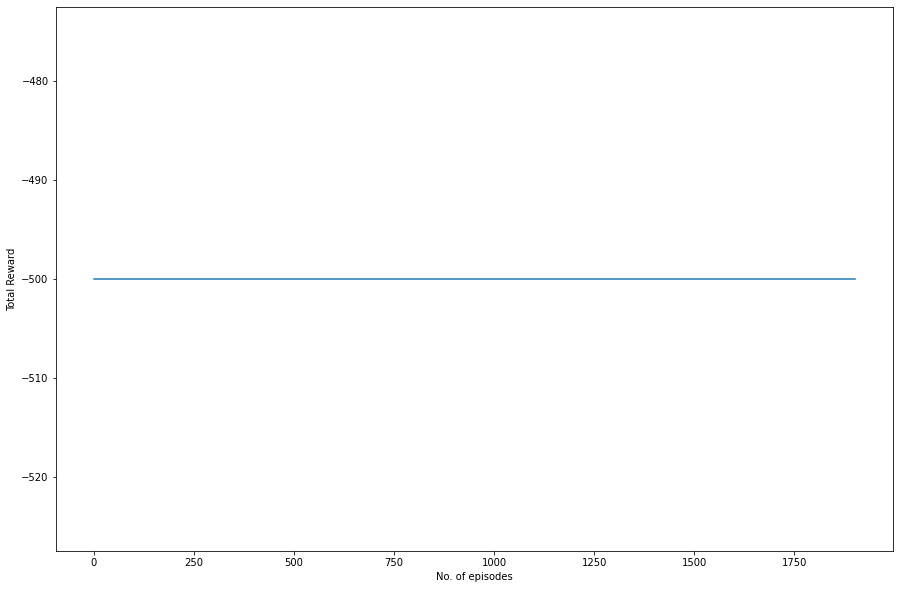

In [6]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [7]:
reward_tot[-1]

-500.0

In [8]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False and no_steps_this_loop<500:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

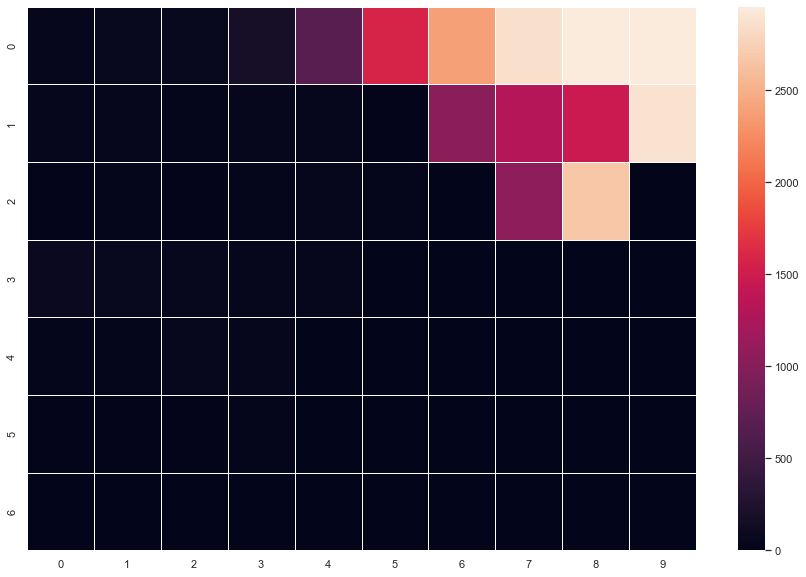

In [9]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [10]:
#for first 2000 rounds of training
alpha = 0.01
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_finite_episode(q,w,alpha,gamma)
  tot_episodes += 100

KeyboardInterrupt: 

In [ ]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [ ]:
reward_tot[-1]

In [ ]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False and no_steps_this_loop < 500:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [ ]:
#for first 2000 rounds of training
alpha = 0.1
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_finite_episode(q,w,alpha,gamma)
  tot_episodes += 100

In [ ]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [ ]:
reward_tot[-1]

In [ ]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False and no_steps_this_loop < 500:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [ ]:
#let us try to plot the value function for the grid
value_grid = np.zeros(times_visited.shape)
for i in range(7):
  for j in range(10):
    s = i*10 +j
    value_grid[i][j] = v(w,s)
val = pd.DataFrame(value_grid)
val